# ДЗ №1 СУНЦ МГУ - Numpy practice

_Задачи позаимствованы из курса ML ФКН ПМИ где они были позаимствованы из курса практикума кафедры ММП факультета ВМК МГУ_ 

### Туториальные задачи
__(9 баллов)__

Ниже приведены задачи на работу с numpy-массивами. Для каждой из задач нужно привести 2 реализации: одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная (без использования питоновских циклов/map/list comprehension). Невекторизованная реализация каждой из задач оценивается в __0.5 балла__, векторизованная – в __1 балл__.

Реализации без использования векторизации нужно записать в файл functions.py, а векторизованные &mdash; в файл functions_vectorized.py

Для каждой задачи, приведённой ниже сравните скорость работы невекторизованной и векторизованной реализации. С помощью пакета matplotlib постройте графики времени работы в зависимости от размера данных. __Графики должны выглядеть опрятно!__ То есть должны быть подписаны оси, названия графиков, и т.д. Например, ниже представлены хороший и плохой графики:

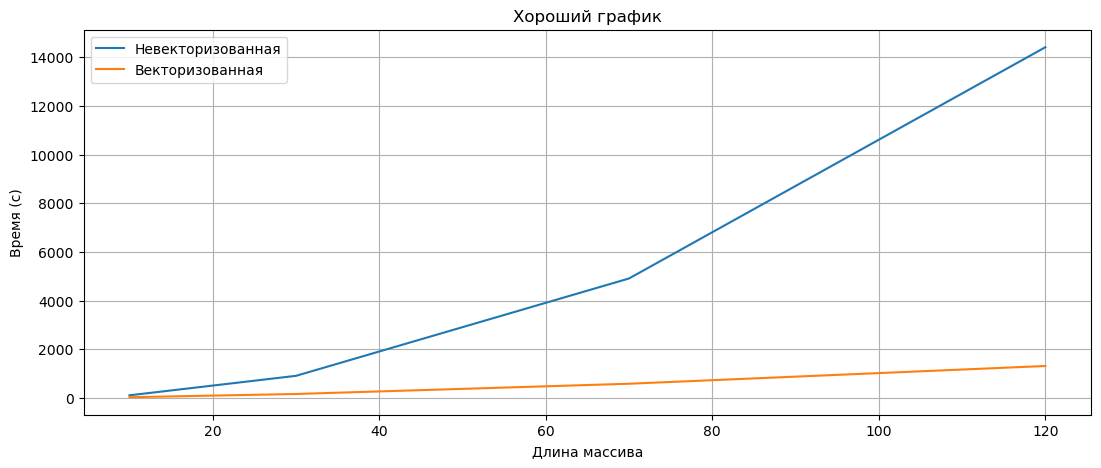

In [17]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

data_size = np.array([10, 30, 70, 120])
time_non_vectorized = data_size ** 2 + 10
time_vectorized = data_size ** 1.5

f, ax2 = plt.subplots(1, 1, figsize=(13, 5))

ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

plt.show()

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ – 3.

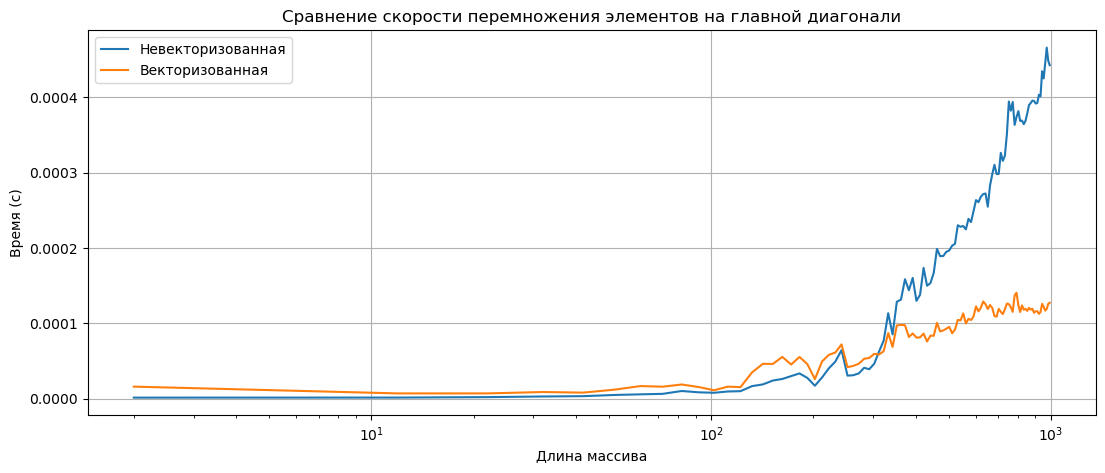

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import time
import sys
import random

def generate_matrix_list(n):
    matrix = []
    for i in range(n):
        row = []
        for j in range(n):
            row.append(random.uniform(0,10))
        matrix.append(row)
    return matrix

def diagonal_product_numpy(matrix):
    diagonal = np.diag(matrix)
    non_zero_elements = diagonal[diagonal != 0]
    return np.prod(non_zero_elements)
def diagonal_product(matrix):
    n = 1
    for i in range(0,len(matrix)):
        if (matrix[i] != 0):
            n *= matrix[i][i]
    return n

def draw_graph(data_size,time_non_vectorized,time_vectorized , name):
    f, ax2 = plt.subplots(1, 1, figsize=(13, 5))
    ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
    ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
    ax2.set_title(name)
    ax2.set_xscale("log", base=10)
    ax2.set_xlabel(u"Длина массива")
    ax2.set_ylabel(u"Время (с)")
    ax2.grid()
    ax2.legend()
    plt.show()

n = 2
data_size = []
time_non_vectorized = []
time_vectorized = []
COUNT = 10
while(n < 1000):
    data_size.append(n)
    time_non_vectorized.append(0)
    time_vectorized.append(0)
    for i in range(0,COUNT):
        matrix = generate_matrix_list(n)
        start = time.time()
        val1 = diagonal_product(matrix)
        time_non_vectorized[-1] += time.time() - start
        matrix = np.array(matrix)
        start = time.time()
        val2 = diagonal_product_numpy(matrix)
        time_vectorized[-1] += time.time() - start
        if val2 != val1:
            print(val1,val2)
            sys.exit(1)
    time_vectorized[-1] /= COUNT
    time_non_vectorized[-1] /=COUNT
    n += 10
draw_graph(data_size,time_non_vectorized,time_vectorized,u"Сравнение скорости перемножения элементов на главной диагонали")





 
 
* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ – True.
  
  


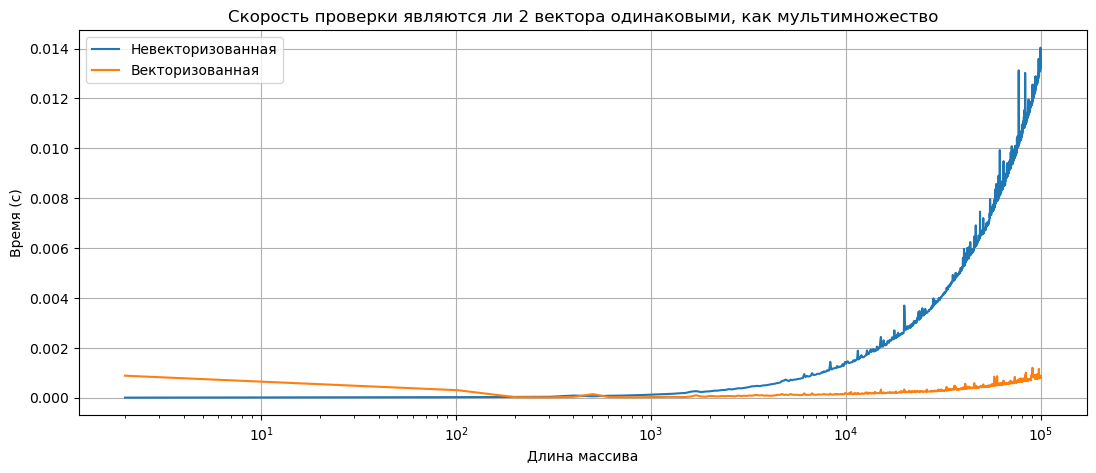

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import time
import sys
import random

def generate_2list(n):
    ls1 = []
    ls2 = []
    for i in range(n):
        ls1.append(random.randint(1,100))
        ls2.append(random.randint(1,100))
    return ls1,ls2

def are_same_multiset_vec(arr1, arr2):
    sorted1 = np.sort(arr1)
    sorted2 = np.sort(arr2)
    return np.array_equal(sorted1, sorted2)

def are_same_multiset(arr1, arr2):
    sorted(arr1)
    sorted(arr2)
    return arr1 == arr2


def draw_graph(data_size,time_non_vectorized,time_vectorized , name):
    f, ax2 = plt.subplots(1, 1, figsize=(13, 5))
    ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
    ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
    ax2.set_title(name)
    ax2.set_xscale("log", base=10)
    ax2.set_xlabel(u"Длина массива")
    ax2.set_ylabel(u"Время (с)")
    ax2.grid()
    ax2.legend()
    plt.show()

n = 2
data_size = []
time_non_vectorized = []
time_vectorized = []
COUNT = 1
while(n < 100000):
    data_size.append(n)
    time_non_vectorized.append(0)
    time_vectorized.append(0)
    for i in range(0,COUNT):
        arr1,arr2 = generate_2list(n)
        start = time.time()
        val1 = are_same_multiset(arr1,arr2)
        time_non_vectorized[-1] += time.time() - start
        arr1,arr2 = np.array(arr1),np.array(arr2)
        start = time.time()
        val2 = are_same_multiset_vec(arr1,arr2)
        time_vectorized[-1] += time.time() - start
        if val2 != val1:
            print(val1,val2)
            sys.exit(1)
    time_vectorized[-1] /= COUNT
    time_non_vectorized[-1] /=COUNT
    n += 100
draw_graph(data_size,time_non_vectorized,time_vectorized,u"Скорость проверки являются ли 2 вектора одинаковыми, как мультимножество")


* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.  
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ – 5.

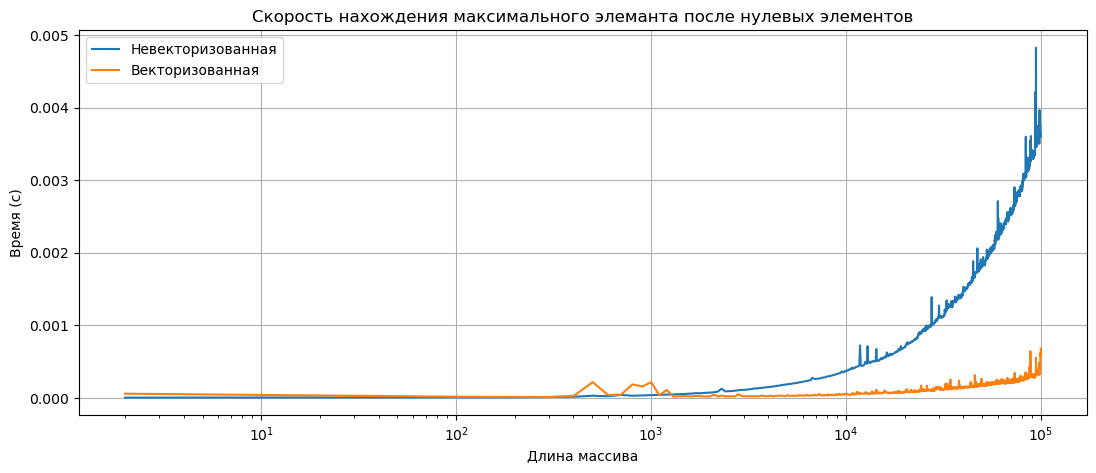

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import time
import sys
import random

def generate_list(n):
    ls = []
    ls.append(0)
    for i in range(n - 1):
        ls.append(random.randint(0,30))
    return ls

def max_after_zero_vec(arr):
    zero_indicator = 1 - np.sign(np.abs(arr[:-1]))
    # Применяем маску к элементам после нулей
    elements_after_zeros = arr[1:] * zero_indicator
    # Находим максимальный элемент (игнорируя нули, которые не были после настоящих нулей)
    # Добавляем -inf чтобы гарантировать корректную работу при отсутствии элементов
    return np.max(np.concatenate([elements_after_zeros, [-np.inf]]))

def max_after_zero(arr):
    res = -1
    for i in range(len(arr) - 1):
        if arr[i] == 0:
            res = max(res,arr[i + 1])
    return res
    


def draw_graph(data_size,time_non_vectorized,time_vectorized , name):
    f, ax2 = plt.subplots(1, 1, figsize=(13, 5))
    ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
    ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
    ax2.set_title(name)
    ax2.set_xscale("log", base=10)
    ax2.set_xlabel(u"Длина массива")
    ax2.set_ylabel(u"Время (с)")
    ax2.grid()
    ax2.legend()
    plt.show()

n = 2
data_size = []
time_non_vectorized = []
time_vectorized = []
COUNT = 1
while(n < (100000)):
    data_size.append(n)
    time_non_vectorized.append(0)
    time_vectorized.append(0)
    for i in range(0,COUNT):
        arr = generate_list(n)
        start = time.time()
        val1 = max_after_zero(arr)
        time_non_vectorized[-1] += time.time() - start
        arr = np.array(arr)
        start = time.time()
        val2 = max_after_zero_vec(arr)
        time_vectorized[-1] += time.time() - start
        if val2 != val1:
            print(val1,val2)
            sys.exit(1)
    time_vectorized[-1] /= COUNT
    time_non_vectorized[-1] /=COUNT
    n += 100
draw_graph(data_size,time_non_vectorized,time_vectorized,u"Скорость нахождения максимального элеманта после нулевых элементов")

 
 
* __ Задача 4__: Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). В ноутбуке приведите пример работы функции – преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow).


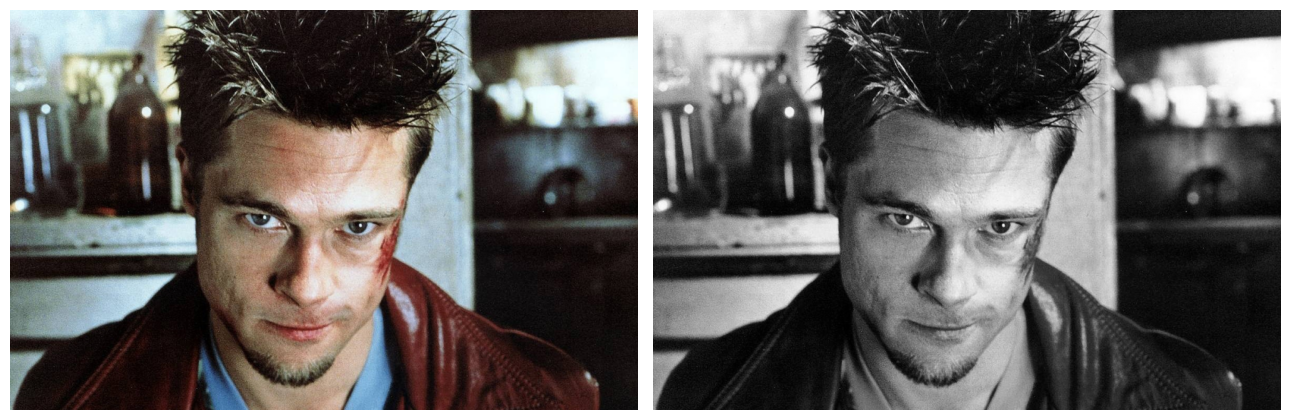

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import time
import sys
import random
from PIL import Image

def channel_weighted_sum_numpy_only(image, weights ):
    result = np.dot(image,weights)
    return result
#def channel_weighted_sum(image,weights):
image = Image.open('tailer.png')
image = image.convert('RGB')
image_array = np.array(image)
f, axes = plt.subplots(1,2,figsize=(13, 5))
axes[0].imshow(image_array)
axes[0].axis('off')  # Скрываем оси
weight = np.array([0.299, 0.587, 0.114])
image_array = channel_weighted_sum_numpy_only(image_array,weight)
axes[1].imshow(image_array,cmap = 'gray')
axes[1].axis('off')  # Скрываем оси
plt.tight_layout()
plt.show()

* __Задача 5__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ – (np.array([2, 3, 5]), np.array([3, 3, 1])).

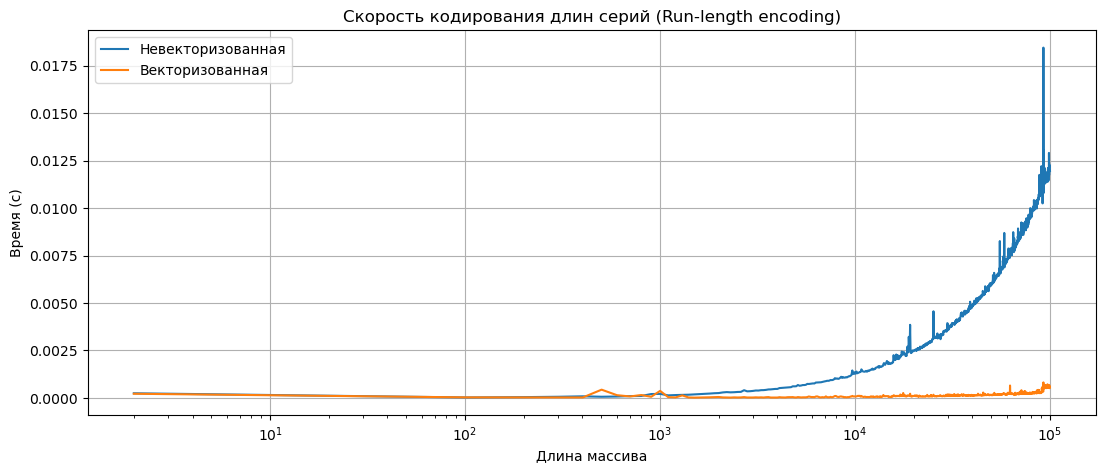

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import time
import sys
import random

def generate_2list(n):
    ls = []
    for i in range(n):
        ls.append(random.randint(1,100))
    return ls

def rle_encode_numpy(x):
    # Находим позиции, где элементы меняются
    changes = np.where(x[:-1] != x[1:])[0] + 1
    # Добавляем начало и конец
    indices = np.concatenate(([0], changes, [len(x)]))
    # Вычисляем значения и длины серий
    values = x[indices[:-1]]
    lengths = np.diff(indices)
    return values, lengths
def rle_encode(x):
    values = []
    lengths = []
    for i in range(len(x)):
        if len(values) > 0 and values[-1] == x[i]:
            lengths[-1] += 1
        else:
            values.append(x[i])
            lengths.append(1)
    return values, lengths
def draw_graph(data_size,time_non_vectorized,time_vectorized , name):
    f, ax2 = plt.subplots(1, 1, figsize=(13, 5))
    ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
    ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
    ax2.set_title(name)
    ax2.set_xscale("log", base=10)
    ax2.set_xlabel(u"Длина массива")
    ax2.set_ylabel(u"Время (с)")
    ax2.grid()
    ax2.legend()
    plt.show()

n = 2
data_size = []
time_non_vectorized = []
time_vectorized = []
COUNT = 1
while(n < 100000):
    data_size.append(n)
    time_non_vectorized.append(0)
    time_vectorized.append(0)
    for i in range(0,COUNT):
        arr = generate_list(n)
        start = time.time()
        val1 = rle_encode(arr)
        time_non_vectorized[-1] += time.time() - start
        arr = np.array(arr)
        start = time.time()
        val2 = rle_encode_numpy(arr)
        time_vectorized[-1] += time.time() - start
    time_vectorized[-1] /= COUNT
    time_non_vectorized[-1] /=COUNT
    n += 100
draw_graph(data_size,time_non_vectorized,time_vectorized,u"Скорость кодирования длин серий (Run-length encoding)")


 
 
* __Задача 6__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Дополнительно сравните с функцией scipy.spatial.distance.cdist по скорости работы (сравнения приведите ниже в ноутбуке). 

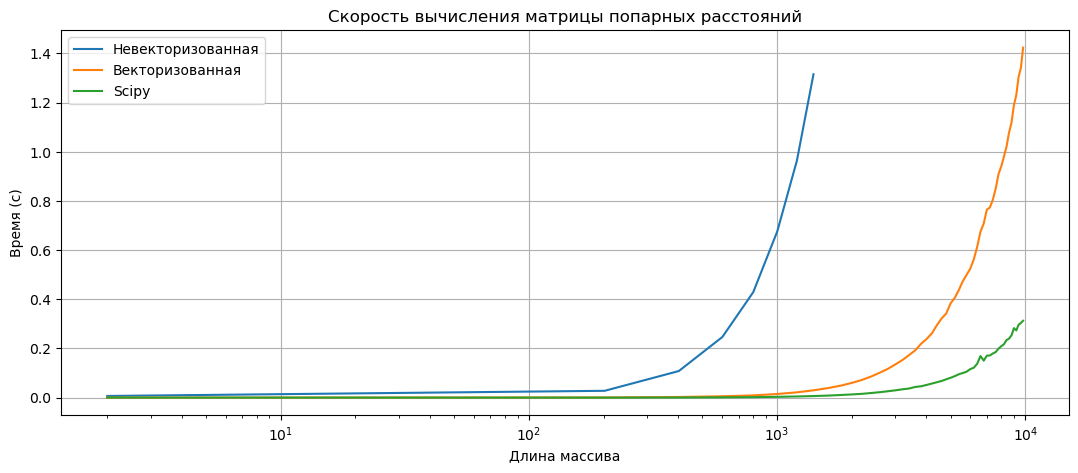

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import time
import sys
import random
import scipy

def generate_list(n, d):
    ls = []    
    for i in range(n):
        res = []
        for j in range(d):
            res.append(random.randint(1,100))
        ls.append(res)
    return ls

def euclidean_dist_matrix_numpy(x, y):
    X_sq = np.sum(x**2, axis=1)[:, np.newaxis]  # shape (n, 1)
    Y_sq = np.sum(y**2, axis=1)                 # shape (m,)
    XY = np.dot(x, y.T)                         # shape (n, m)
    
    # Вычисляем квадраты расстояний
    distance_sq = X_sq + Y_sq - 2 * XY
    
    # Для численной стабильности (избегаем отрицательных значений из-за ошибок округления)
    distance_sq = np.maximum(distance_sq, 0)
    
    return np.sqrt(distance_sq)
def euclidean_dist_matrix(x,y):
    ans = []
    for i in range(len(x)):
        res = []
        for j in range(len(y)):
            res.append(0)
            for u in range(len(x[0])):
                res[-1] += (((x[i][u] - y[j][u]) **2 ))
            res[-1] = res[-1] ** 0.5
        ans.append(res)
    return ans

def draw_graph(data_size1,data_size2,time_non_vectorized,time_vectorized ,time_scipy, name):
    f, ax2 = plt.subplots(1, 1, figsize=(13, 5))
    ax2.plot(data_size2, time_non_vectorized, label=u"Невекторизованная")
    ax2.plot(data_size1, time_vectorized, label=u"Векторизованная")
    ax2.plot(data_size1, time_scipy, label=u"Scipy")
    ax2.set_title(name)
    ax2.set_xscale("log", base=10)
    ax2.set_xlabel(u"Длина массива")
    ax2.set_ylabel(u"Время (с)")
    ax2.grid()
    ax2.legend()
    plt.show()

n = 2
data_size1 = []
data_size2 = []
time_non_vectorized = []
time_vectorized = []
time_scipy = []
COUNT = 1
d = 3
while(n < 10000):
    data_size1.append(n)
    if(n < 1500):
        data_size2.append(n)
        time_non_vectorized.append(0)
    time_vectorized.append(0)
    time_scipy.append(0)
    for i in range(0,COUNT):
        x,y = generate_list(n,d),generate_list(n,d)
        if(n < 1500):
            start = time.time()
            val1 = euclidean_dist_matrix(x,y)
            time_non_vectorized[-1] += time.time() - start
        x,y = np.array(x),np.array(y)
        start = time.time()
        val2 = euclidean_dist_matrix_numpy(x,y)
        time_vectorized[-1] += time.time() - start
        start = time.time()
        val3 = scipy.spatial.distance.cdist(x,y)
        time_scipy[-1] += time.time() - start

    time_vectorized[-1] /= COUNT
    time_non_vectorized[-1] /=COUNT
    time_scipy[-1] /= COUNT
    n += 200
draw_graph(data_size1,data_size2,time_non_vectorized,time_vectorized,time_scipy,u"Скорость вычисления матрицы попарных расстояний")


### Туториал по Markdown

__(1 балл)__

Напишите краткий (а в данной домашке ещё и почти бесмысленный) отчёт с использованием 4-5 различных вариантов разметки/выделения текста.

In [ ]:
# code here